In [2]:
import pandas as pd
import numpy as np
import ta, ta.trend, ta.momentum
import joblib
import matplotlib.pyplot as plt

def add_ta_features(df, timeframe,rsi_window=14, sma_windows=(5, 20)):
    df = df.copy()
    
    rsi = ta.momentum.RSIIndicator(close=df["close"], window=rsi_window)
    df["rsi_14"] = rsi.rsi()
    
    macd = ta.trend.MACD(close=df["close"])
    df["macd"] = macd.macd()
    df["macd_signal"] = macd.macd_signal()

    sma_short = ta.trend.SMAIndicator(close=df["close"], window=sma_windows[0])
    sma_long = ta.trend.SMAIndicator(close=df["close"], window=sma_windows[1])
    
    df[f"sma_{sma_windows[0]}"] = sma_short.sma_indicator()
    df[f"sma_{sma_windows[1]}"] = sma_long.sma_indicator()

    df["return"] = df["close"].pct_change(periods=timeframe)

    df["future_return"] = df["close"].shift(-1) / df["close"] - 1
    df["target"] = (df["future_return"] > 0).astype(int)
    df = df.dropna()
    return df

def aggregate_and_forwardfill_news(news_df, timeframe='1H'):
    news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])
    numeric_cols = news_df.select_dtypes(include='number').columns.tolist()
    numeric_cols.append('timestamp')
    news_df = news_df[numeric_cols]
    news_df = news_df.set_index('timestamp')
    news_aggregated = news_df.resample(timeframe).mean()
    sentiment_columns = news_aggregated.columns
    news_aggregated[sentiment_columns] = news_aggregated[sentiment_columns].ffill()
    news_aggregated[sentiment_columns] = news_aggregated[sentiment_columns].fillna(0)
    news_aggregated = news_aggregated.reset_index()
    return news_aggregated

def merge_df(df1, df2):
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df2['timestamp'] = pd.to_datetime(df2['timestamp'])

    df1 = df1.set_index('timestamp')
    df2 = df2.set_index('timestamp')

    merged_df = df1.join(df2, how='left')
    merged_df = merged_df.reset_index()
    sentiment_cols = df2.columns
    merged_df[sentiment_cols] = merged_df[sentiment_cols].fillna(0)
    return merged_df

In [3]:
btc_hourly = pd.read_csv("./datasets/crypto/hourly/BTC.csv")
btc_4hourly = pd.read_csv("./datasets/crypto/4hourly/BTC.csv")
btc_daily = pd.read_csv("./datasets/crypto/daily/BTC.csv")
btc_weekly = pd.read_csv("./datasets/crypto/weekly/BTC.csv")
btc_news = pd.read_csv("./datasets/crypto/news/BTC_news.csv")


eth_hourly = pd.read_csv("./datasets/crypto/hourly/BTC.csv")
eth_4hourly = pd.read_csv("./datasets/crypto/4hourly/BTC.csv")
eth_daily = pd.read_csv("./datasets/crypto/daily/BTC.csv")
eth_weekly = pd.read_csv("./datasets/crypto/weekly/BTC.csv")
eth_news = pd.read_csv("./datasets/crypto/news/ETH_news.csv")


aapl_hourly = pd.read_csv("./datasets/stocks/hourly/AAPL.csv")
aapl_4hourly = pd.read_csv("./datasets/stocks/4hourly/AAPL.csv")
aapl_daily = pd.read_csv("./datasets/stocks/daily/AAPL.csv")
aapl_weekly = pd.read_csv("./datasets/stocks/weekly/AAPL.csv")
aapl_news = pd.read_csv("./datasets/stocks/news/AAPL_news.csv")


tsla_hourly = pd.read_csv("./datasets/stocks/hourly/TSLA.csv")
tsla_4hourly = pd.read_csv("./datasets/stocks/4hourly/TSLA.csv")
tsla_daily = pd.read_csv("./datasets/stocks/daily/TSLA.csv")
tsla_weekly = pd.read_csv("./datasets/stocks/weekly/TSLA.csv")
tsla_news = pd.read_csv("./datasets/stocks/news/TSLA_news.csv")


amzn_hourly = pd.read_csv("./datasets/stocks/hourly/AMZN.csv")
amzn_4hourly = pd.read_csv("./datasets/stocks/4hourly/AMZN.csv")
amzn_daily = pd.read_csv("./datasets/stocks/daily/AMZN.csv")
amzn_weekly = pd.read_csv("./datasets/stocks/weekly/AMZN.csv")
amzn_news = pd.read_csv("./datasets/stocks/news/AMZN_news.csv")

In [4]:
btc_hourly = add_ta_features(btc_hourly, 1)
btc_4hourly = add_ta_features(btc_4hourly, 4)
btc_daily = add_ta_features(btc_daily, 24)
btc_weekly = add_ta_features(btc_weekly, 168)

btc_news_hourly = aggregate_and_forwardfill_news(btc_news, '1h')
btc_news_4hourly = aggregate_and_forwardfill_news(btc_news, '4h')
btc_news_daily = aggregate_and_forwardfill_news(btc_news, '1d')
btc_news_weekly = aggregate_and_forwardfill_news(btc_news, '1W')

eth_hourly = add_ta_features(eth_hourly, 1)
eth_4hourly = add_ta_features(eth_4hourly, 4)
eth_daily = add_ta_features(eth_daily, 24)
eth_weekly = add_ta_features(eth_weekly, 168)

eth_news_hourly = aggregate_and_forwardfill_news(eth_news, '1h')
eth_news_4hourly = aggregate_and_forwardfill_news(eth_news, '4h')
eth_news_daily = aggregate_and_forwardfill_news(eth_news, '1d')
eth_news_weekly = aggregate_and_forwardfill_news(eth_news, '1W')

aapl_hourly = add_ta_features(aapl_hourly, 1)
aapl_4hourly = add_ta_features(aapl_4hourly, 4)
aapl_daily = add_ta_features(aapl_daily, 24)
aapl_weekly = add_ta_features(aapl_weekly, 120)

aapl_news_hourly = aggregate_and_forwardfill_news(aapl_news, '1h')
aapl_news_4hourly = aggregate_and_forwardfill_news(aapl_news, '4h')
aapl_news_daily = aggregate_and_forwardfill_news(aapl_news, '1d')
aapl_news_weekly = aggregate_and_forwardfill_news(aapl_news, 'W-FRI')

tsla_hourly = add_ta_features(tsla_hourly, 1)
tsla_4hourly = add_ta_features(tsla_4hourly, 4)
tsla_daily = add_ta_features(tsla_daily, 24)
tsla_weekly = add_ta_features(tsla_weekly, 120)

tsla_news_hourly = aggregate_and_forwardfill_news(tsla_news, '1h')
tsla_news_4hourly = aggregate_and_forwardfill_news(tsla_news, '4h')
tsla_news_daily = aggregate_and_forwardfill_news(tsla_news, '1d')
tsla_news_weekly = aggregate_and_forwardfill_news(tsla_news, 'W-FRI')

amzn_hourly = add_ta_features(amzn_hourly, 1)
amzn_4hourly = add_ta_features(amzn_4hourly, 4)
amzn_daily = add_ta_features(amzn_daily, 24)
amzn_weekly = add_ta_features(amzn_weekly, 120)

amzn_news_hourly = aggregate_and_forwardfill_news(amzn_news, '1h')
amzn_news_4hourly = aggregate_and_forwardfill_news(amzn_news, '4h')
amzn_news_daily = aggregate_and_forwardfill_news(amzn_news, '1d')
amzn_news_weekly = aggregate_and_forwardfill_news(amzn_news, 'W-FRI')

In [5]:
merged_btc_hourly = merge_df(btc_hourly, btc_news_hourly)
merged_btc_4hourly = merge_df(btc_4hourly, btc_news_4hourly)
merged_btc_daily = merge_df(btc_daily, btc_news_daily)
merged_btc_weekly = merge_df(btc_weekly, btc_news_weekly)

merged_eth_hourly = merge_df(eth_hourly, eth_news_hourly)
merged_eth_4hourly = merge_df(eth_4hourly, eth_news_4hourly)
merged_eth_daily = merge_df(eth_daily, eth_news_daily)
merged_eth_weekly = merge_df(eth_weekly, eth_news_weekly)

merged_aapl_hourly = merge_df(aapl_hourly, aapl_news_hourly)
merged_aapl_4hourly = merge_df(aapl_4hourly, aapl_news_4hourly)
merged_aapl_daily = merge_df(aapl_daily, aapl_news_daily)
merged_aapl_weekly = merge_df(aapl_weekly, aapl_news_weekly)

merged_tsla_hourly = merge_df(tsla_hourly, tsla_news_hourly)
merged_tsla_4hourly = merge_df(tsla_4hourly, tsla_news_4hourly)
merged_tsla_daily = merge_df(tsla_daily, tsla_news_daily)
merged_tsla_weekly = merge_df(tsla_weekly, tsla_news_weekly)

merged_amzn_hourly = merge_df(amzn_hourly, amzn_news_hourly)
merged_amzn_4hourly = merge_df(amzn_4hourly, amzn_news_4hourly)
merged_amzn_daily = merge_df(amzn_daily, amzn_news_daily)
merged_amzn_weekly = merge_df(amzn_weekly, amzn_news_weekly)

In [1]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define feature columns without has_news
FEATURE_COLUMNS = [
    'open', 'high', 'low', 'close', 'volume',
    'rsi_14', 'macd', 'macd_signal',
    'sma_5', 'sma_20', 'return',
    'overall_sentiment_score', 'ticker_sentiment'
]

def train_and_evaluate_random_forest(df, target_column='target', model_path=None):
    X = df[FEATURE_COLUMNS]
    y = df[target_column]
    
    train_size = int(0.8 * len(df))
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]
    
    model = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)
    
    if model_path:
        joblib.dump(model, model_path)
    
    y_pred = model.predict(X_test)
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    return metrics

In [6]:
metrics_btc_hourly = train_and_evaluate_random_forest(merged_btc_hourly, model_path='models/randomforest/btc_hourly.pkl')
metrics_btc_4hourly = train_and_evaluate_random_forest(merged_btc_4hourly, model_path='models/randomforest/btc_4hourly.pkl')
metrics_btc_daily = train_and_evaluate_random_forest(merged_btc_daily, model_path='models/randomforest/btc_daily.pkl')
metrics_btc_weekly = train_and_evaluate_random_forest(merged_btc_weekly, model_path='models/randomforest/btc_weekly.pkl')

metrics_eth_hourly = train_and_evaluate_random_forest(merged_eth_hourly, model_path='models/randomforest/eth_hourly.pkl')
metrics_eth_4hourly = train_and_evaluate_random_forest(merged_eth_4hourly, model_path='models/randomforest/eth_4hourly.pkl')
metrics_eth_daily = train_and_evaluate_random_forest(merged_eth_daily, model_path='models/randomforest/eth_daily.pkl')
metrics_eth_weekly = train_and_evaluate_random_forest(merged_eth_weekly, model_path='models/randomforest/eth_weekly.pkl')

metrics_aapl_hourly = train_and_evaluate_random_forest(merged_aapl_hourly, model_path='models/randomforest/aapl_hourly.pkl')
metrics_aapl_4hourly = train_and_evaluate_random_forest(merged_aapl_4hourly, model_path='models/randomforest/aapl_4hourly.pkl')
metrics_aapl_daily = train_and_evaluate_random_forest(merged_aapl_daily, model_path='models/randomforest/aapl_daily.pkl')
metrics_aapl_weekly = train_and_evaluate_random_forest(merged_aapl_weekly, model_path='models/randomforest/aapl_weekly.pkl')

metrics_tsla_hourly = train_and_evaluate_random_forest(merged_tsla_hourly, model_path='models/randomforest/tsla_hourly.pkl')
metrics_tsla_4hourly = train_and_evaluate_random_forest(merged_tsla_4hourly, model_path='models/randomforest/tsla_4hourly.pkl')
metrics_tsla_daily = train_and_evaluate_random_forest(merged_tsla_daily, model_path='models/randomforest/tsla_daily.pkl')
metrics_tsla_weekly = train_and_evaluate_random_forest(merged_tsla_weekly, model_path='models/randomforest/tsla_weekly.pkl')

metrics_amzn_hourly = train_and_evaluate_random_forest(merged_amzn_hourly, model_path='models/randomforest/amzn_hourly.pkl')
metrics_amzn_4hourly = train_and_evaluate_random_forest(merged_amzn_4hourly, model_path='models/randomforest/amzn_4hourly.pkl')
metrics_amzn_daily = train_and_evaluate_random_forest(merged_amzn_daily, model_path='models/randomforest/amzn_daily.pkl')
metrics_amzn_weekly = train_and_evaluate_random_forest(merged_amzn_weekly, model_path='models/randomforest/amzn_weekly.pkl')

In [7]:
print(f'BTC Hourly: {metrics_btc_hourly}')
print(f'BTC Weekly: {metrics_btc_4hourly}')
print(f'BTC Weekly: {metrics_btc_daily}')
print(f'BTC Weekly: {metrics_btc_weekly}\n\n')

print(f'ETH Hourly: {metrics_eth_hourly}')
print(f'ETH Weekly: {metrics_eth_4hourly}')
print(f'ETH Weekly: {metrics_eth_daily}')
print(f'ETH Weekly: {metrics_eth_weekly}\n\n')

print(f'AAPL Hourly: {metrics_aapl_hourly}')
print(f'AAPL Weekly: {metrics_aapl_4hourly}')
print(f'AAPL Weekly: {metrics_aapl_daily}')
print(f'AAPL Weekly: {metrics_aapl_weekly}\n\n')

print(f'TSLA Hourly: {metrics_tsla_hourly}')
print(f'TSLA Weekly: {metrics_tsla_4hourly}')
print(f'TSLA Weekly: {metrics_tsla_daily}')
print(f'TSLA Weekly: {metrics_tsla_weekly}\n\n')

print(f'AMZN Hourly: {metrics_amzn_hourly}')
print(f'AMZN Weekly: {metrics_amzn_4hourly}')
print(f'AMZN Weekly: {metrics_amzn_daily}')
print(f'AMZN Weekly: {metrics_amzn_weekly}\n\n')

BTC Hourly: {'accuracy': 0.5448666127728375, 'precision': 0.5428815004262575, 'recall': 0.6359097263830638, 'f1_score': 0.5857247976453275}
BTC Weekly: {'accuracy': 0.517799352750809, 'precision': 0.5177453027139874, 'recall': 0.7873015873015873, 'f1_score': 0.6246851385390428}
BTC Weekly: {'accuracy': 0.5307125307125307, 'precision': 0.515625, 'recall': 0.17098445595854922, 'f1_score': 0.25680933852140075}
BTC Weekly: {'accuracy': 0.5769230769230769, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}


ETH Hourly: {'accuracy': 0.5463823767178658, 'precision': 0.5459545777146912, 'recall': 0.6145396444977033, 'f1_score': 0.5782204265714554}
ETH Weekly: {'accuracy': 0.5230582524271845, 'precision': 0.521832884097035, 'recall': 0.7682539682539683, 'f1_score': 0.6215088282504013}
ETH Weekly: {'accuracy': 0.5552825552825553, 'precision': 0.59375, 'recall': 0.19689119170984457, 'f1_score': 0.29571984435797666}
ETH Weekly: {'accuracy': 0.5769230769230769, 'precision': 0.0, 'recall': 0.0, 'f1_

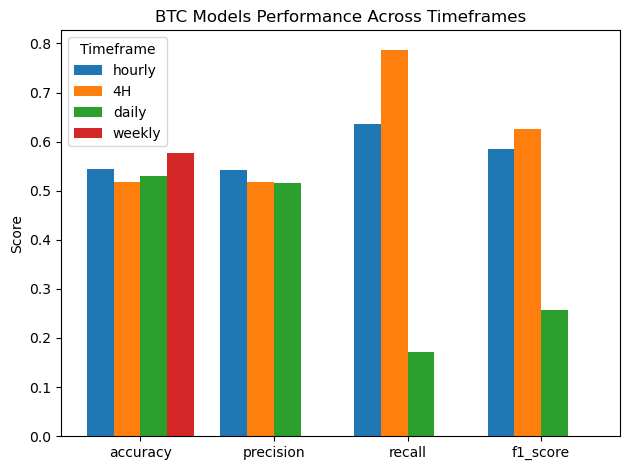

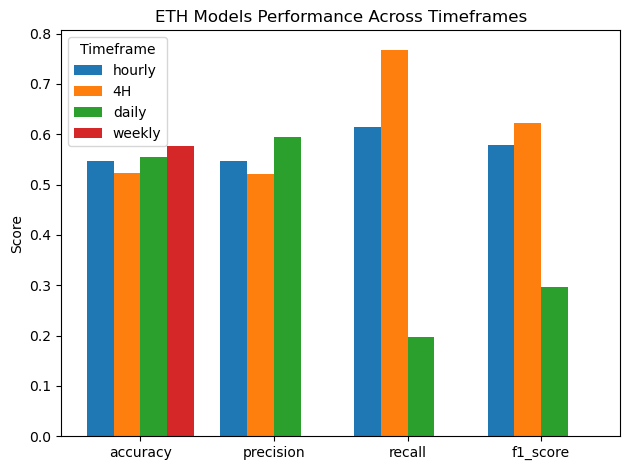

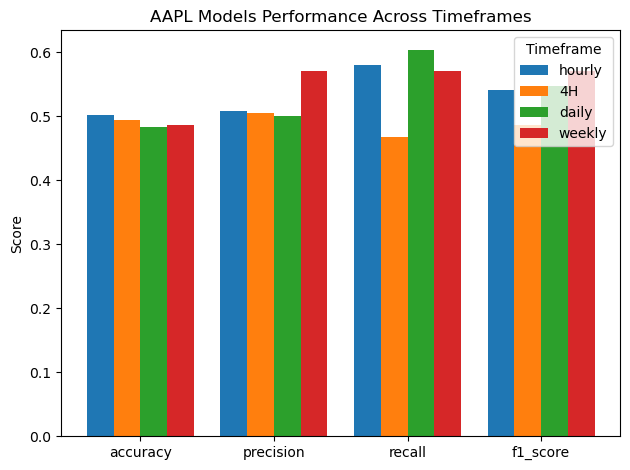

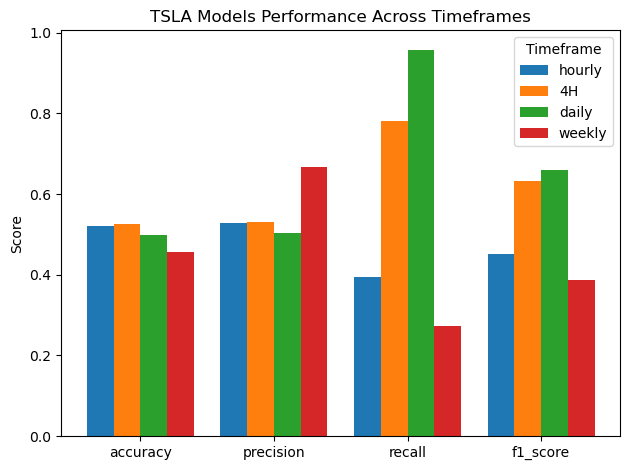

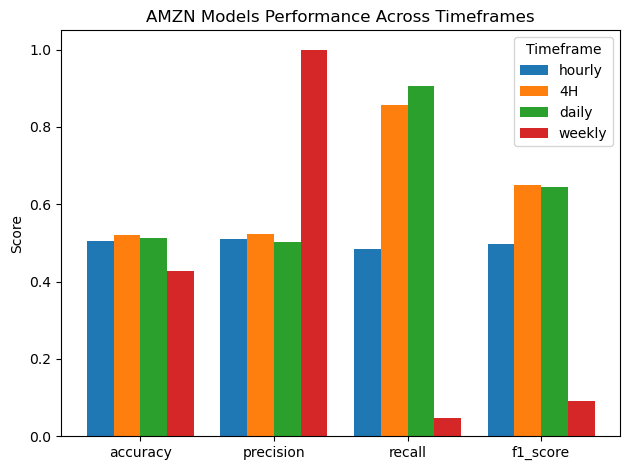

In [8]:
import matplotlib.pyplot as plt

def plot_asset_timeframe_metrics_list(metrics_list, title, timeframes=None):
    if timeframes is None:
        timeframes = ['hourly', '4H', 'daily', 'weekly']
    if len(timeframes) != len(metrics_list):
        raise ValueError("timeframes and metrics_list must have the same length")
    
    metric_names = list(metrics_list[0].keys())
    n_metrics = len(metric_names)
    n_tfs = len(timeframes)
    x = range(n_metrics)
    
    width = 0.8 / n_tfs
    offsets = [(i - n_tfs/2 + 0.5) * width for i in range(n_tfs)]
    
    fig, ax = plt.subplots()
    for idx, (tf_label, metrics) in enumerate(zip(timeframes, metrics_list)):
        vals = [metrics[m] for m in metric_names]
        positions = [pos + offsets[idx] for pos in x]
        ax.bar(positions, vals, width=width, label=tf_label)
    
    ax.set_xticks(x)
    ax.set_xticklabels(metric_names)
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend(title='Timeframe')
    plt.tight_layout()
    plt.show()

plot_asset_timeframe_metrics_list([metrics_btc_hourly, metrics_btc_4hourly, metrics_btc_daily, metrics_btc_weekly], title='BTC Models Performance Across Timeframes')
plot_asset_timeframe_metrics_list([metrics_eth_hourly, metrics_eth_4hourly, metrics_eth_daily, metrics_eth_weekly], title='ETH Models Performance Across Timeframes')
plot_asset_timeframe_metrics_list([metrics_aapl_hourly, metrics_aapl_4hourly, metrics_aapl_daily, metrics_aapl_weekly], title='AAPL Models Performance Across Timeframes')
plot_asset_timeframe_metrics_list([metrics_tsla_hourly, metrics_tsla_4hourly, metrics_tsla_daily, metrics_tsla_weekly], title='TSLA Models Performance Across Timeframes')
plot_asset_timeframe_metrics_list([metrics_amzn_hourly, metrics_amzn_4hourly, metrics_amzn_daily, metrics_amzn_weekly], title='AMZN Models Performance Across Timeframes')

In [9]:
def plot_accuracy_by_timeframe(metrics_list, title, timeframes=None):
    # Default labels
    if timeframes is None:
        timeframes = ['hourly', '4H', 'daily', 'weekly']
    if len(timeframes) != len(metrics_list):
        raise ValueError("timeframes and metrics_list must be the same length")
    
    # Extract accuracy values
    accuracies = [metrics['accuracy'] for metrics in metrics_list]
    
    # Plot
    fig, ax = plt.subplots()
    ax.bar(timeframes, accuracies)
    ax.set_xlabel('Timeframe')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{title} Model Accuracy by Timeframe')
    ax.set_ylim(0, 1)  # accuracy ranges from 0 to 1
    plt.tight_layout()
    plt.show()

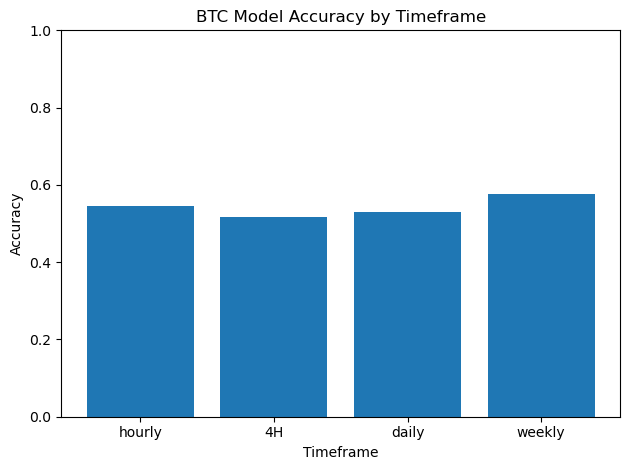

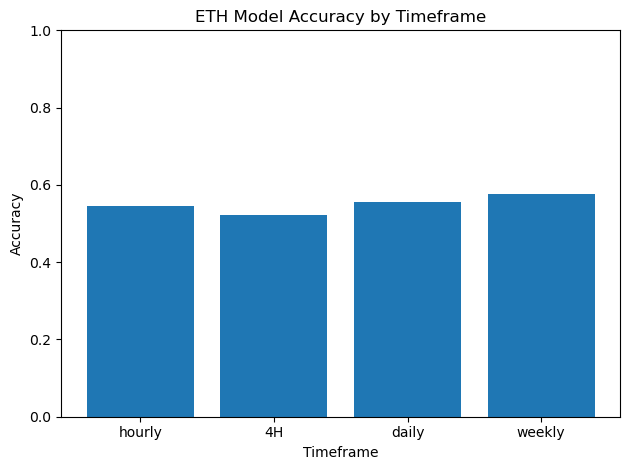

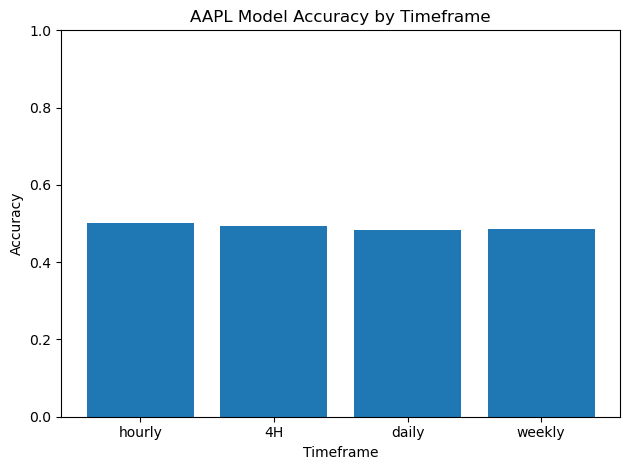

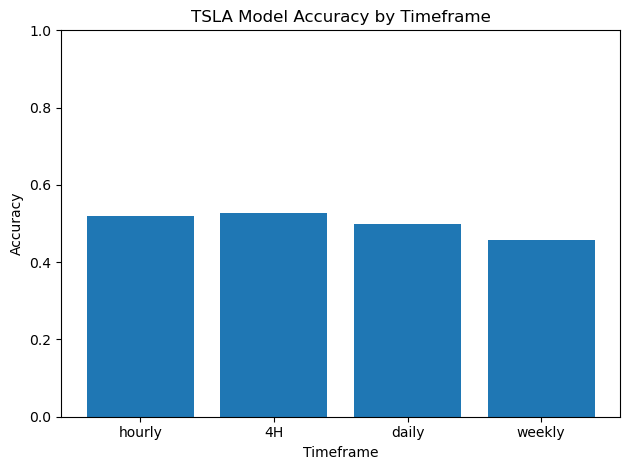

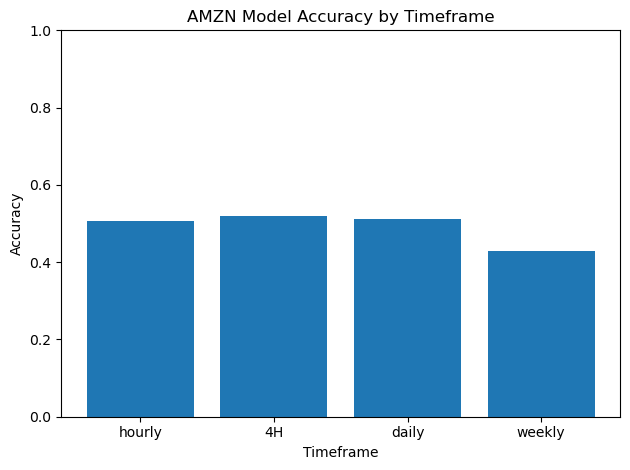

In [10]:
plot_accuracy_by_timeframe([metrics_btc_hourly, metrics_btc_4hourly, metrics_btc_daily, metrics_btc_weekly], 'BTC')
plot_accuracy_by_timeframe([metrics_eth_hourly, metrics_eth_4hourly, metrics_eth_daily, metrics_eth_weekly], 'ETH')
plot_accuracy_by_timeframe([metrics_aapl_hourly, metrics_aapl_4hourly, metrics_aapl_daily, metrics_aapl_weekly], 'AAPL')
plot_accuracy_by_timeframe([metrics_tsla_hourly, metrics_tsla_4hourly, metrics_tsla_daily, metrics_tsla_weekly], 'TSLA')
plot_accuracy_by_timeframe([metrics_amzn_hourly, metrics_amzn_4hourly, metrics_amzn_daily, metrics_amzn_weekly], 'AMZN')